In [41]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib import style
style.use("ggplot")
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import lazypredict



# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [42]:
#file_path = Path("../Resources/metro_2br.csv")
#metro_df = pd.read_csv(file_path)
#metro_df.drop(columns='indicator_id', inplace=True)
#metro_df.head()


#metro_df.set_index(pd.to_datetime(metro_df['date']), inplace=True)
#metro_df.drop('date', axis=1, inplace=True)
#metro_df.head()

### Detroit Condo Regression

In [43]:
file_path = Path("../Resources/det_condo.csv")
metro_df = pd.read_csv(file_path)
metro_df = metro_df.drop('indicator_id',axis=1)
metro_df = metro_df.drop('region_id',axis=1)
metro_df = metro_df.sort_values('date')
metro_df['date'] = pd.to_datetime(metro_df['date'])
metro_df = metro_df.set_index('date')
metro_df = metro_df.dropna()
metro_df.head()

,value,region,change,lagged_change
date,,,,
1996-01-31,123341.0,"Detroit, MI",-41.259477,-0.159763
1996-02-29,123718.0,"Detroit, MI",0.305657,-41.259477
1996-03-31,124052.0,"Detroit, MI",0.269969,0.305657
1996-04-30,124806.0,"Detroit, MI",0.607810,0.269969
1996-05-31,125558.0,"Detroit, MI",0.602535,0.607810


<AxesSubplot:xlabel='date'>

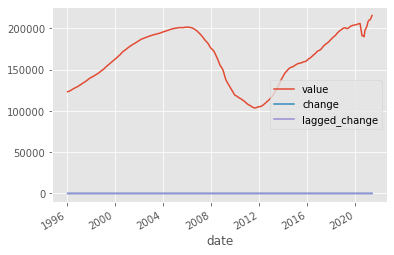

In [44]:
metro_df.plot()

In [45]:
#Build Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [46]:
# Separate the data into the X and y components
# In this case, y will be the `value` and X will be the remainign columns

#X = metro_df.drop(columns='value', axis=1)
X = metro_df.lagged_change.to_frame()
y = metro_df.change.values

In [47]:
# Fit the model to the data

model.fit(X, y)

LinearRegression()

In [48]:
predicted_y_values = model.predict(X)
predicted_y_values

array([ 3.29042013e-02, -2.34181222e+00,  5.97958451e-02,  5.77338215e-02,
        7.72540583e-02,  7.69493013e-02,  7.73390255e-02,  7.56621735e-02,
        7.26037942e-02,  6.86892983e-02,  6.72169188e-02,  7.18162287e-02,
        7.86677216e-02,  7.95020105e-02,  7.55624469e-02,  7.75157766e-02,
        7.34270451e-02,  7.51631140e-02,  7.22638160e-02,  7.90439830e-02,
        7.93628065e-02,  8.35631973e-02,  8.14634529e-02,  8.14477025e-02,
        7.20724820e-02,  6.82519361e-02,  6.85855082e-02,  6.87915464e-02,
        7.18792118e-02,  7.18077295e-02,  7.58791473e-02,  6.96053901e-02,
        7.48081410e-02,  7.86608428e-02,  8.48019086e-02,  7.51595672e-02,
        7.40015342e-02,  7.91151101e-02,  8.78935229e-02,  8.70392814e-02,
        8.47671905e-02,  8.07439946e-02,  8.15675475e-02,  7.81197159e-02,
        8.22707403e-02,  7.71757861e-02,  8.00484124e-02,  7.82153184e-02,
        8.18958397e-02,  8.06635574e-02,  7.60261922e-02,  7.86744035e-02,
        7.83749584e-02,  

In [49]:
#Extracting coef, intercept

model.coef_
model.intercept_


0.042135189023966436

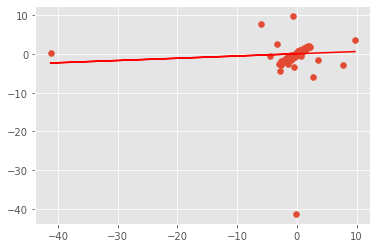

In [50]:
#Plotting Results

plt.scatter(X, y)
plt.plot(X, predicted_y_values, color='red')

In [51]:
#Metrics - score, R2, mse, rmse, std

from sklearn.metrics import mean_squared_error, r2_score

score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

In [52]:
# Print the score, r2, mse, rmse, and standard deviation
print(f"Score: {score}")
print(f"R-squared (R2 ): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation: {np.std(y)}")

Score: 0.0033389221841714223
R-squared (R2 ): 0.0033389221841714223
Mean Squared Error (MSE): 7.044625161571084
Root Mean Squared Error (RMSE): 2.6541712758544964
Standard Deviation: 2.6586134386585827


In [53]:
#Build Logistic Regression

#train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [54]:
#Create Model
#classifier = LogisticRegression(solver='lbfgs', warm_start=True, random_state=78)
#classifier

In [55]:
# Train the data
#classifier.fit(X_train, y_train)

In [56]:
# Score the model
#print(f"Training Data Score: {classifier.score(X_train, y_train)}")
#print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [57]:
# Predict outcomes for test data set
#predictions = classifier.predict(X_test)
#pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [58]:
#Confusion Matrix
#from sklearn.metrics import confusion matrix
#confusion_matrix(y_test, predictions)

In [59]:
#Classification Report
#from sklearn.metrics import classsification report
#print(classification_report(y_test, predictions))

In [60]:
#Build LSTM Model

def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [61]:
# Predict Percent Change of Housing Prices using a 10 month window of previous fng values
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 3

# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 3
target_column = 2
X, y = window_data(metro_df, window_size, feature_column, target_column)

In [62]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.8 * len(X))

X_train = X[: split]
X_test = X[split:]
y_train = y [: split]
y_test = y[split:]

In [63]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
#scaler = MinMaxScaler()
#scaler.fit(X)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)
#scaler.fit(y)
#y_train = scaler.transform(y_train)
#y_test = scaler.transform(y_test)


In [64]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [66]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

model = Sequential()

number_units = 10
dropout_fraction = 0.2


# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [67]:
# Compile the model
model.compile(optimizer='adam', loss="mean_squared_error")

In [68]:
# Summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 3, 10)             480       
_________________________________________________________________
dropout_3 (Dropout)          (None, 3, 10)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 3, 10)             840       
_________________________________________________________________
dropout_4 (Dropout)          (None, 3, 10)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [69]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

Epoch 1/10
239/239 [==============================] - 4s 2ms/step - loss: 0.5136
Epoch 2/10
239/239 [==============================] - 1s 2ms/step - loss: 0.2206
Epoch 3/10
239/239 [==============================] - 1s 2ms/step - loss: 0.2081
Epoch 4/10
239/239 [==============================] - 1s 2ms/step - loss: 0.2090
Epoch 5/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1945
Epoch 6/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1875
Epoch 7/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1921
Epoch 8/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1992
Epoch 9/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1985
Epoch 10/10
239/239 [==============================] - 1s 2ms/step - loss: 0.1871


In [70]:
# Evaluate the model
model.evaluate(X_test, y_test)

2/2 [==============================] - 1s 2ms/step - loss: 3.8604


3.860440492630005

In [71]:
# Make some predictions
predicted = model.predict(X_test)

In [72]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [73]:
# Create a DataFrame of Real and Predicted values
housing = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = metro_df.index[-len(real_prices): ]) 

housing.tail()

,Real,Predicted
date,,
2021-01-31,35.690662,-15.511964
2021-02-28,146.289867,-0.887977
2021-03-31,-8.449511,2.152954
2021-04-30,-22.171139,-19.702387
2021-05-31,-28.956216,-16.120985


<AxesSubplot:xlabel='date'>

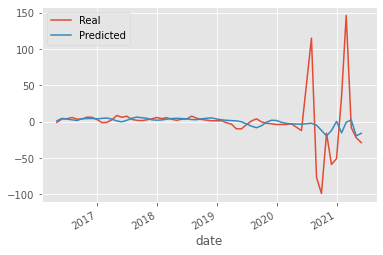

In [74]:
# Plot the real vs predicted values as a line chart
housing.plot()

In [75]:
#Lazy Predict - Regression

#from lazypredict.Supervised import LazyClassifier
#from sklearn.datasets import load_breast_cancer
#from sklearn.model_selection import train_test_split

#data = load_breast_cancer()
#X = data.data
#y= data.target

#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

#clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
#models,predictions = clf.fit(X_train, X_test, y_train, y_test)

#print(models)